<a href="https://colab.research.google.com/github/majorquev/Introduccion_a_ciencia_de_datos_R/blob/master/Ayudant%C3%ADas/Ayudant%C3%ADa4/A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parte 3: Reglas de Asociación y Clustering (I)**

**Autor:** Miguel Jorquera Viguera<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Bastián Aballay Leiva<br>
**E-mail ayudante:** bastian.aballayleiva@gmail.com

   
   

# Sección 1
## ¿Un cafecito?
A usted se le solicita analizar las ventas de los distintos productos ofrecidos por una cafetería. Para ello usted deberá generar una descripción de dichas ventas,utilizando estadísticos descriptivos, gráficos  y además deberá incluir un análisis de la venta cruzada de los productos en cuestión. 

El siguiente archivo contiene los registros de las ventas de una cafetería en un determinado período.
Ustede deberá responder las siguientes preguntas con el objetivo de generar recomendaciones de ventas en distintos períodos de tiempo.

In [5]:
trans_original <- read.csv("https://raw.githubusercontent.com/majorquev/Introduccion_a_ciencia_de_datos_R/master/Ayudant%C3%ADas/Ayudant%C3%ADa4/cafeteria.csv")

In [6]:
summary(trans_original)

     Date               Time            Transaction       Item          
 Length:21293       Length:21293       Min.   :   1   Length:21293      
 Class :character   Class :character   1st Qu.:2548   Class :character  
 Mode  :character   Mode  :character   Median :5067   Mode  :character  
                                       Mean   :4952                     
                                       3rd Qu.:7329                     
                                       Max.   :9684                     

In [66]:
str(trans_original)

'data.frame':	21293 obs. of  4 variables:
 $ Date       : chr  "2016-10-30" "2016-10-30" "2016-10-30" "2016-10-30" ...
 $ Time       : chr  "09:58:11" "10:05:34" "10:05:34" "10:07:57" ...
 $ Transaction: int  1 2 2 3 3 3 4 5 5 5 ...
 $ Item       : chr  "Bread" "Scandinavian" "Scandinavian" "Hot chocolate" ...


In [67]:
head(trans_original)
tail(trans_original)

,Date,Time,Transaction,Item
,<chr>,<chr>,<int>,<chr>
1,2016-10-30,09:58:11,1,Bread
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:05:34,2,Scandinavian
4,2016-10-30,10:07:57,3,Hot chocolate
5,2016-10-30,10:07:57,3,Jam
6,2016-10-30,10:07:57,3,Cookies


,Date,Time,Transaction,Item
,<chr>,<chr>,<int>,<chr>
21288,2017-04-09,14:32:58,9682,Tacos/Fajita
21289,2017-04-09,14:32:58,9682,Coffee
21290,2017-04-09,14:32:58,9682,Tea
21291,2017-04-09,14:57:06,9683,Coffee
21292,2017-04-09,14:57:06,9683,Pastry
21293,2017-04-09,15:04:24,9684,Smoothies


In [7]:
# MUESTRA EN R BASE
# Observar el comportamiento "intermedio" en los datos
# 0. Fijar la muestra -> establecer una semilla
set.seed(1)
# 1. Generamos un indice
muestra_index <- sample(1:nrow(trans_original), 10)
# 2. Obtener una muestra
trans_sample <- trans_original[muestra_index,]
trans_sample

,Date,Time,Transaction,Item
,<chr>,<chr>,<int>,<chr>
17401,2017-03-11,11:30:56,7942,Coffee
4775,2016-11-28,16:45:21,2259,Cookies
13218,2017-02-08,12:25:12,6220,Farm House
10539,2017-01-20,16:53:40,5016,Cookies
8462,2016-12-31,10:27:52,4040,Bread
4050,2016-11-23,12:49:38,1910,Bread
13499,2017-02-10,13:40:52,6336,Cake
11571,2017-01-28,11:08:10,5496,NONE
12257,2017-02-02,13:01:10,5800,Farm House


In [10]:
# MUESTRA EN DPLYR
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:arules’:

    intersect, recode, setdiff, setequal, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [8]:
set.seed(6)
trans_sample_2 <- trans_original %>% sample_n(10)
trans_sample_2

ERROR: ignored

In [71]:
unique(trans_sample$Item)

[1] "Coffee"     "Cookies"    "Farm House" "Bread"      "Cake"      
[6] "NONE"

In [72]:
# Notamos que el item NONE aparece 786 veces, por lo que se decide eliminar este registro.
#filter(trans_original, Item == "NONE") %>% count()
trans_original %>% filter(Item == 'NONE') %>% count()

n
<int>
786


In [11]:
trans_original <- trans_original %>% filter(Item != 'NONE')

In [12]:
summary(trans_original)

     Date               Time            Transaction       Item          
 Length:20507       Length:20507       Min.   :   1   Length:20507      
 Class :character   Class :character   1st Qu.:2552   Class :character  
 Mode  :character   Mode  :character   Median :5137   Mode  :character  
                                       Mean   :4976                     
                                       3rd Qu.:7357                     
                                       Max.   :9684                     

**P1)** Genere tres nuevas columnas, que contengan la hora, minutos  y segundos de la transacción registrada.
A modo de referencia, su tabla debería contener al menos los siguientes campos, de los cuales se muestran los primeros 6 registros.

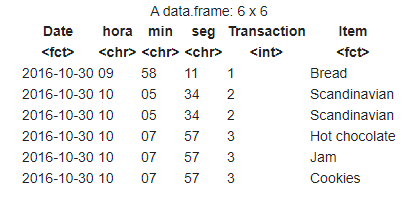

De ser de utilidad, puede consultar la documentación de las funciones substr y separate de los packages base y tidyr respectivamente.

In [13]:
# P1 --------------------------------------------------
# Respuesta
library(tidyr)
# 1er intento
trans_original <- trans_original %>%
  separate(Time, c('hora','min','seg'), sep = ':')


Attaching package: ‘tidyr’


The following objects are masked from ‘package:Matrix’:

    expand, pack, unpack




In [14]:
head(trans_original)

,Date,hora,min,seg,Transaction,Item
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,2016-10-30,09,58,11,1,Bread
2,2016-10-30,10,05,34,2,Scandinavian
3,2016-10-30,10,05,34,2,Scandinavian
4,2016-10-30,10,07,57,3,Hot chocolate
5,2016-10-30,10,07,57,3,Jam
6,2016-10-30,10,07,57,3,Cookies


**P2)**  Genere una tabla resumen que contenga la siguiente información.

* `hora`: Hora donde se registraron las transacciones. por ejemplo, el valor 09 indica el bloque horario comprendido entre las 09:00 y 09:59 hrs. 
* `total_trx` : total de transacciones distintas generadas en el bloque horario respectivo.
* `total_items`: total de items vendidos en el bloque horario respectivo.
* `total_items_unicos`: total de items únicos venidos en el bloque horario respectivo.


In [15]:
# P2 --------------------------------------------------
# Respuesta
resumen <- trans_original %>%
            group_by(hora) %>%
            summarize(total_trx = length(unique(Transaction)),
                      total_items = n(),
                      total_items_unicos = length(unique(Item)))

resumen

`summarise()` ungrouping output (override with `.groups` argument)



hora,total_trx,total_items,total_items_unicos
<chr>,<int>,<int>,<int>
01,1,1,1
07,16,24,5
08,375,645,42
09,1006,1966,48
10,1266,2666,63
11,1439,3102,65
12,1325,2854,65
13,1143,2617,68
14,1120,2640,67


In [80]:
trans_original %>%
  group_by(hora) %>%
  summarize(total_trx = length(unique(Transaction)),
            total_items = n(),
            total_items_unicos = length(unique(Item))) %>%
  filter(hora == '09')

`summarise()` ungrouping output (override with `.groups` argument)



hora,total_trx,total_items,total_items_unicos
<chr>,<int>,<int>,<int>
09,1006,1966,48


**P3)** Con base en la tabla anterior, diremos que una hora pertenece al horario punta si la **cantidad de transacciones distintas** generadas en dicho bloque supera las 1000 transacciones. 

**a)** ¿Qué horas comprende el horario punta?<br>
**b)** En promedio, ¿cuántas transacciones distintas por hora se dieron en horario punta?¿y en horario no punta? 


In [83]:
# P3 --------------------------------------------------
# Respuesta
resumen %>%
  filter(total_trx > 1000)

hora,total_trx,total_items,total_items_unicos
<chr>,<int>,<int>,<int>
09,1006,1966,48
10,1266,2666,63
11,1439,3102,65
12,1325,2854,65
13,1143,2617,68
14,1120,2640,67


In [86]:
resumen %>%
  mutate(hora_punta = ifelse(hora %in% c('09','10','11','12','13','14') , "Hora Punta", "Hora Normal"))

hora,total_trx,total_items,total_items_unicos,hora_punta
<chr>,<int>,<int>,<int>,<chr>
01,1,1,1,Hora Normal
07,16,24,5,Hora Normal
08,375,645,42,Hora Normal
09,1006,1966,48,Hora Punta
10,1266,2666,63,Hora Punta
11,1439,3102,65,Hora Punta
12,1325,2854,65,Hora Punta
13,1143,2617,68,Hora Punta
14,1120,2640,67,Hora Punta


In [88]:
resumen %>%
  mutate(hora_punta = ifelse(hora %in% c('09','10','11','12','13','14') , "Hora Punta", "Hora Normal")) %>%# as.character(seq(9:14)) <- sería una solución si no fuera character la hora
  group_by(hora_punta) %>%
  summarize(promedio_total_trx = mean(total_trx),
            sd_total_trx = sd(total_trx),
            coef_var = sd_total_trx/promedio_total_trx)

`summarise()` ungrouping output (override with `.groups` argument)



hora_punta,promedio_total_trx,sd_total_trx,coef_var
<chr>,<dbl>,<dbl>,<dbl>
Hora Normal,180.5,295.9771,1.6397624
Hora Punta,1216.5,156.6866,0.1288012


El horario punta comprende desde las 09:00 hasta las 14:59.

### Análisis de los productos vendidos.
Con el objetivo de aumentar las ventas, se le solicita a usted analizar los itmes y las ventas cruzadas entre los productos ofrecidos. Para ello usted guía su análisis en función de las siguientes preguntas.

**P4)** ¿Cuáles son los 5 items más vendidos? Ilustre mediante un gráfico de barras o una tabla.

In [92]:
# Respuesta
trans_original %>%
  count(Item) %>%
  arrange(-n) %>% # desc(n)
  head(5)

,Item,n
,<chr>,<int>
1,Coffee,5471
2,Bread,3325
3,Tea,1435
4,Cake,1025
5,Pastry,856


In [96]:
trans_original %>%
  count(Item, sort = TRUE) %>%
  head(5)

,Item,n
,<chr>,<int>
1,Coffee,5471
2,Bread,3325
3,Tea,1435
4,Cake,1025
5,Pastry,856


In [ ]:
# Dependencias: paquetes necesarios para ejecutar rutinas de un paquete a instalar
# Por ejemplo: si el paquete utilizando permite hacer pronóstico de series de tiempo, me interesaría
# graficar y eso se puede lograr con ggplot2. Si los autores consideran ggplot2 para graficar
# entonces ggplot2 será instalado.

#install.packages("arules")
#install.packages("arules", dependencies = TRUE)

library(arules)

In [25]:
head(trans_original)

,Date,hora,min,seg,Transaction,Item
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,2016-10-30,09,58,11,1,Bread
2,2016-10-30,10,05,34,2,Scandinavian
3,2016-10-30,10,05,34,2,Scandinavian
4,2016-10-30,10,07,57,3,Hot chocolate
5,2016-10-30,10,07,57,3,Jam
6,2016-10-30,10,07,57,3,Cookies


In [20]:
# 1. Obtener Items
# trans_original[,'Item'] # trans_original$Items
# 2. Obtener Transacciones
# trans_original$Transaction
# 3. Divir el dataset
# "split" divide los datos en x en los grupos definidos por "f"
# split(x = trans_original[,'Item'], f = trans_original[,'Transaction'])
# 4. Requerimiento aprior: objeto transaction
tr <- as(split(trans_original[,'Item'],trans_original[,'Transaction']) , 'transactions') # Coersión de lista a objeto transaction
# Coersion: forzar el cambio de clase/tipo de dato de uno a otro: string -> number

Warning message in asMethod(object):
“removing duplicated items in transactions”


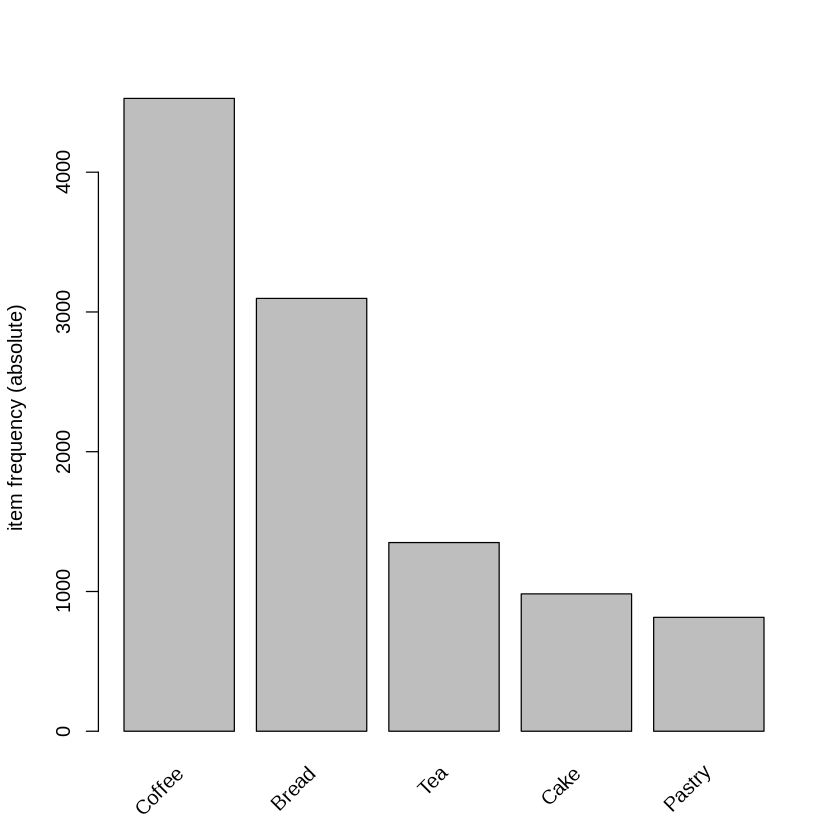

In [21]:
itemFrequencyPlot(tr,
                  topN = 5,
                  type = 'absolute')

**P5)** ¿Cambian estos 5 ítems según el horario de atención? Para ello muestre los 5 items más vendidos en los siguientes horarios.

* 7:00-11:59
* 12:00-16:59
* 17:00-23:59

,Item,n
,<chr>,<int>
1,Coffee,2561
2,Bread,1609
3,Pastry,604
4,Tea,456
5,Medialuna,402


Warning message in asMethod(object):
“removing duplicated items in transactions”
Warning message in asMethod(object):
“removing duplicated items in transactions”
Warning message in asMethod(object):
“removing duplicated items in transactions”


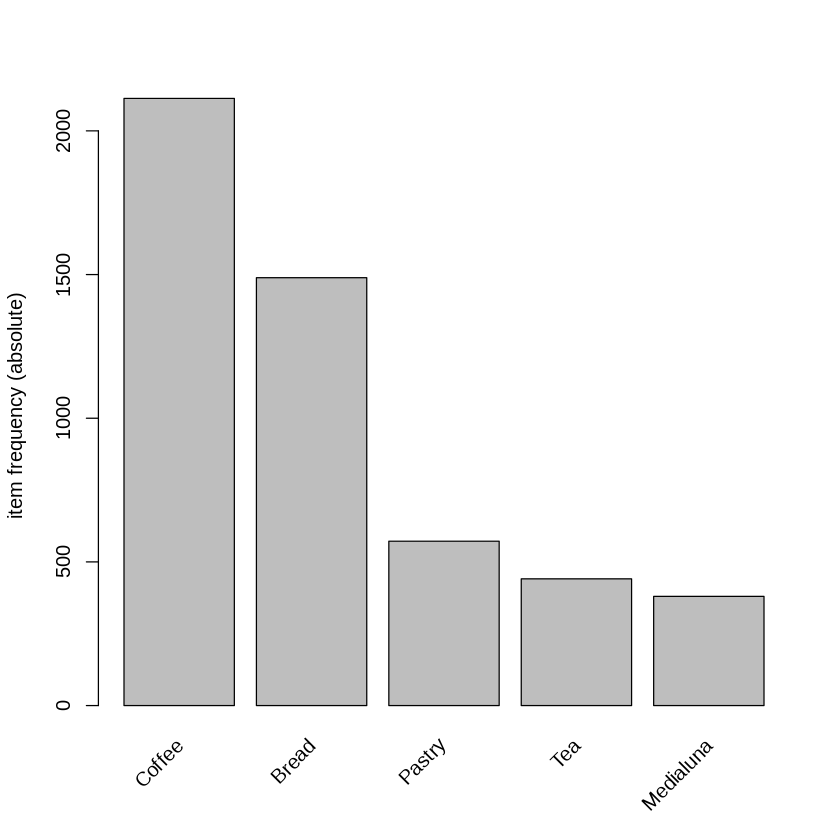

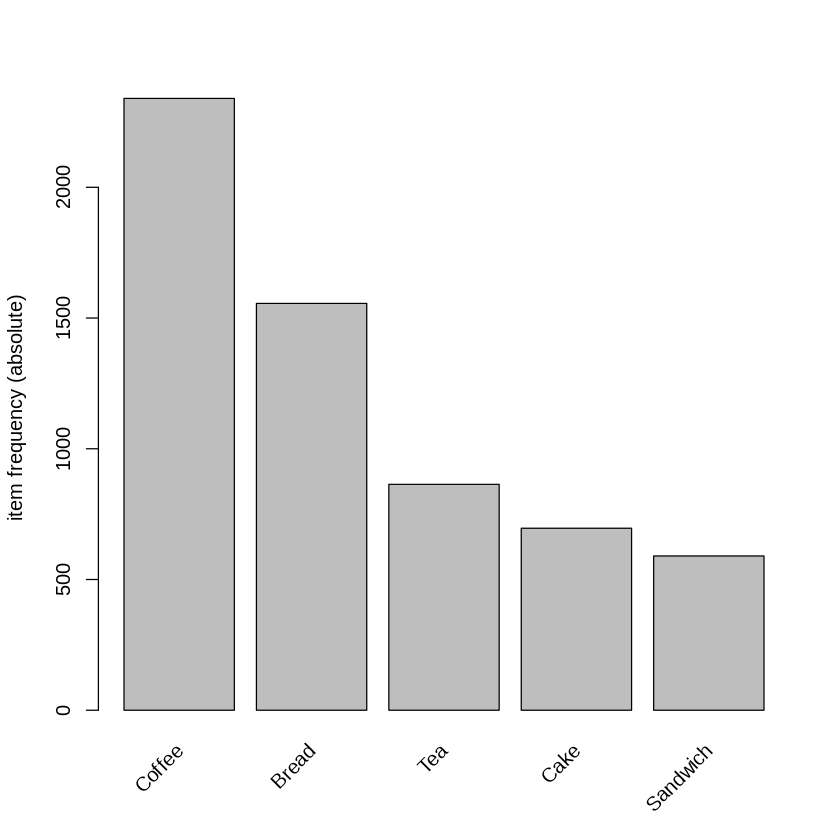

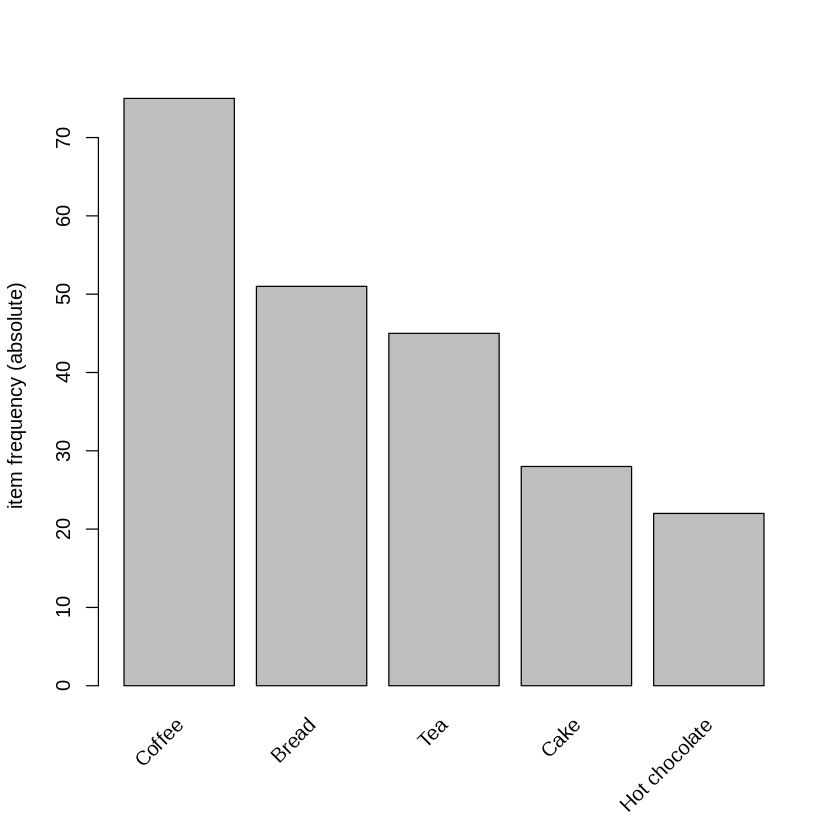

In [47]:
#head(trans_original, 2)
df1 <- filter(trans_original, hora %in% c('07','08','09','10','11'))
df2 <- filter(trans_original, hora %in% c('12','13','14','15','16'))
df3 <- filter(trans_original, as.numeric(hora) >= 17 & as.numeric(hora) <= 23) # Qué pasa si quiero filtrar por números: Coersión! PENDIENTE!
# between(as.numeric(trans_original$hora),17,23)
#head(df1)

# Método dplyr (tabla)
df1 %>%
  count(Item, sort = TRUE) %>%
  head(5)

# Método arules (gráfico)
tr1 <- as(split(df1[,'Item'],df1[,'Transaction']) , 'transactions')
tr2 <- as(split(df2[,'Item'],df2[,'Transaction']) , 'transactions')
tr3 <- as(split(df3[,'Item'],df3[,'Transaction']) , 'transactions')

itemFrequencyPlot(tr1, topN = 5, type = 'absolute')
itemFrequencyPlot(tr2, topN = 5, type = 'absolute')
itemFrequencyPlot(tr3, topN = 5, type = 'absolute')


### Genereación de reglas

**P6)** Considerando un **support mínimo de 0.02** , un  **confidence mínimo de 0.1** y teniendo en cuenta que **no se deben considerar reglas de asociación cuyo antecedente o consecuente sean vacíos**,

**a)** ¿Cuál es la regla de asociación más frecuente en cada uno de los horarios indicados en **P5)**?<br>
**b)** ¿Cuál es la regla de asociación con mayor confidence en cada uno de los horarios indicados en **P5)**? <br>
**c)** ¿Cuál es la regla de asociación con mayor lift en cada uno de los horarios indicados en **P5)**? <br>

**NOTA:** En caso de no obtener reglas con los parámetros indicados, modifíquelos, pero tenga en consideración este hecho al momento de argumentar las preguntas posteriores.

In [64]:
tr1 <- as(split(df1[,'Item'],df1[,'Transaction']) , 'transactions')
tr2 <- as(split(df2[,'Item'],df2[,'Transaction']) , 'transactions')
tr3 <- as(split(df3[,'Item'],df3[,'Transaction']) , 'transactions')

reglas_1 <- apriori(data = tr1, parameter = list(supp = 0.02, conf = 0.1, minlen = 2))
reglas_2 <- apriori(data = tr2, parameter = list(supp = 0.02, conf = 0.1, minlen = 2))
reglas_3 <- apriori(data = tr3, parameter = list(supp = 0.02, conf = 0.1, minlen = 2))

Warning message in asMethod(object):
“removing duplicated items in transactions”
Warning message in asMethod(object):
“removing duplicated items in transactions”
Warning message in asMethod(object):
“removing duplicated items in transactions”


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.1    0.1    1 none FALSE            TRUE       5    0.02      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 82 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[76 item(s), 4102 transaction(s)] done [0.00s].
sorting and recoding items ... [18 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [15 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.1    0.1    1 none FALSE            TRUE       5    0.02      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
   

In [56]:
head(sort(reglas_1, by = 'support',decreasing = TRUE),1) %>% inspect() # Regla 1 + frecuente horario 1: {Bread} -> Coffee
head(sort(reglas_2, by = 'support',decreasing = TRUE),1) %>% inspect() # Regla 2 + frecuente horario 2: {Bread} -> Coffee
head(sort(reglas_3, by = 'support',decreasing = TRUE),1) %>% inspect() # Regla 3 + frecuente horario 3: {Cake} -> Coffee

    lhs        rhs      support    confidence coverage  lift      count
[1] {Bread} => {Coffee} 0.09410044 0.2592344  0.3629937 0.5032558 386  
    lhs        rhs      support    confidence coverage  lift      count
[1] {Bread} => {Coffee} 0.08999803 0.2943445  0.3057575 0.6401363 458  
    lhs       rhs      support    confidence coverage  lift count
[1] {Cake} => {Coffee} 0.05860806 0.5714286  0.1025641 2.08 16   


In [57]:
head(sort(reglas_1, by = 'confidence',decreasing = TRUE),1) %>% inspect() # Regla 1 + frecuente horario 1: {Toast} -> Coffee
head(sort(reglas_2, by = 'confidence',decreasing = TRUE),1) %>% inspect() # Regla 2 + frecuente horario 2: {pastry} -> Coffee
head(sort(reglas_3, by = 'confidence',decreasing = TRUE),1) %>% inspect() # Regla 3 + frecuente horario 3: {Postcard} -> Tshirt

    lhs        rhs      support    confidence coverage   lift     count
[1] {Toast} => {Coffee} 0.03583618 0.7205882  0.04973184 1.398889 147  
    lhs         rhs      support    confidence coverage   lift   count
[1] {Pastry} => {Coffee} 0.02554529 0.5579399  0.04578503 1.2134 130  
    lhs           rhs      support    confidence coverage   lift count
[1] {Postcard} => {Tshirt} 0.02197802 0.6        0.03663004 7.8  6    


In [58]:
head(sort(reglas_1, by = 'lift',decreasing = TRUE),1) %>% inspect() # Regla 1 + frecuente horario 1: {Toast} -> Coffee
head(sort(reglas_2, by = 'lift',decreasing = TRUE),1) %>% inspect() # Regla 2 + frecuente horario 2: {Cake} -> Tea
head(sort(reglas_3, by = 'lift',decreasing = TRUE),1) %>% inspect() # Regla 3 + frecuente horario 3: {Tshirt} -> Postcard

    lhs        rhs      support    confidence coverage   lift     count
[1] {Toast} => {Coffee} 0.03583618 0.7205882  0.04973184 1.398889 147  
    lhs       rhs   support    confidence coverage  lift    count
[1] {Cake} => {Tea} 0.03261938 0.2385057  0.1367656 1.40481 166  
    lhs         rhs        support    confidence coverage   lift count
[1] {Tshirt} => {Postcard} 0.02197802 0.2857143  0.07692308 7.8  6    


**P7)** Se quiere potenciar un segundo producto por la compra de un café en los tres horarios definidos previamente.

**a)** Genere tres listados (uno por cada rango horario) con todas las reglas que contengan el producto `Coffee` en el antecedente.<br>
**b)** ¿Qué promoción recomendaría en cada horario por la compra de un café?. Justifique su respuesta basándose en los indicadores support, confidence y lift.


In [63]:
reglas_coffee_1 <- apriori(
  data = tr1, 
  parameter = list(supp = 0.02, conf = 0.1, minlen = 2),
  appearance = list(default = 'rhs', lhs = 'Coffee'),
  control = list(verbose = FALSE)
  )

reglas_coffee_2 <- apriori(
data = tr2, 
parameter = list(supp = 0.02, conf = 0.1, minlen = 2),
appearance = list(default = 'rhs', lhs = 'Coffee'),
control = list(verbose = FALSE)
)

reglas_coffee_3 <- apriori(
data = tr3, 
parameter = list(supp = 0.02, conf = 0.1, minlen = 2),
appearance = list(default = 'rhs', lhs = 'Coffee'),
control = list(verbose = FALSE)
)

inspect(reglas_coffee_1)
inspect(reglas_coffee_2)
inspect(reglas_coffee_3)

    lhs         rhs         support    confidence coverage  lift      count
[1] {Coffee} => {Medialuna} 0.05460751 0.1060104  0.5151146 1.1443545 224  
[2] {Coffee} => {Pastry}    0.07727938 0.1500237  0.5151146 1.0758690 317  
[3] {Coffee} => {Bread}     0.09410044 0.1826787  0.5151146 0.5032558 386  
    lhs         rhs        support    confidence coverage  lift      count
[1] {Coffee} => {Sandwich} 0.06229122 0.1354701  0.4598153 1.1684869 317  
[2] {Coffee} => {Cake}     0.07191983 0.1564103  0.4598153 1.1436376 366  
[3] {Coffee} => {Tea}      0.05718216 0.1243590  0.4598153 0.7324801 291  
[4] {Coffee} => {Bread}    0.08999803 0.1957265  0.4598153 0.6401363 458  
    lhs         rhs             support    confidence coverage  lift      count
[1] {Coffee} => {Alfajores}     0.03296703 0.1200000  0.2747253 2.0475000  9   
[2] {Coffee} => {Hot chocolate} 0.03296703 0.1200000  0.2747253 1.4890909  9   
[3] {Coffee} => {Cookies}       0.03296703 0.1200000  0.2747253 1.6380000  9   
[

**Respuesta** 
**b)**
Esta es una pregunta abierta, y las opciones de respuestas pueden ser varias. A modo de ejemplo, basándose en el listado anterior, algunas opciones serían:

   1. Optar por la asociación con mayor lift,dado que se asume que todas las reglas ya cumplen el mínimo deseable de support y confidence <br>
       * Horario 1: {Coffee} =&gt; {Pastry}
       * Horario 2: {Coffee} =&gt; {Sandwich} 
       * Horario 3: {Coffee} =&gt; {Cake}
   * Optar por aquellas relaciones con alto lift, pero que a la vez no se encuentren dentro de las más frecuentas (pregunta **P3.4.a** asumiendo que las relaciones frecuentes no es necesario potenciarlas aun más (todo dependerá del negocio):<br>
       * Horario 1: {Coffee} =&gt; {Pastry}
       * Horario 2: {Coffee} =&gt; {Sandwich} 
       * Horario 3: {Coffee} =&gt; {Alfajores}
       

# Sección 2
## En busca de la felicidad

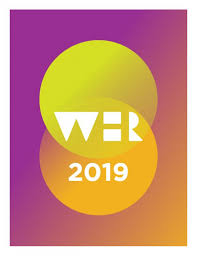

El Informe Mundial sobre la Felicidad es una encuesta histórica sobre el estado de la felicidad mundial. El primer informe se publicó en 2012, el segundo en 2013, el tercero en 2015 y el cuarto en la Actualización de 2016. El World Happiness 2017, que clasifica a 155 países por sus niveles de felicidad, fue lanzado en las Naciones Unidas en un evento que celebra el Día Internacional de la Felicidad el 20 de marzo. El informe continúa ganando reconocimiento mundial a medida que los gobiernos, las organizaciones y la sociedad civil utilizan cada vez más los indicadores de felicidad para informar sus decisiones de formulación de políticas. Los principales expertos en todos los campos (economía, psicología, análisis de encuestas, estadísticas nacionales, salud, políticas públicas y más) describen cómo las mediciones del bienestar se pueden utilizar de manera efectiva para evaluar el progreso de las naciones. Los informes revisan el estado de la felicidad en el mundo actual y muestran cómo la nueva ciencia de la felicidad explica las variaciones personales y nacionales de la felicidad.

Para mayor información sobre este informe, refiérase al siguiente link [https://worldhappiness.report/](https://worldhappiness.report/).


## Datos

Usted deberá analizar 6 indicadores para los 156 países países considerados para el reporte del año 2019. Cada indicador muestra la contribución al nivel de felicidad de cada país. Para más información considere la referencia [https://www.kaggle.com/unsdsn/world-happiness](https://www.kaggle.com/unsdsn/world-happiness).

Sin embargo en esta oportunidad, se dejará abierto el tipo de análisis a realizar, aunque con algunas pequeñas directrices a modo de poder ir aplicando algunos de los temas vistos en clases.



In [65]:
data <- read.csv("https://raw.githubusercontent.com/majorquev/Introduccion_a_ciencia_de_datos_R/master/Ayudant%C3%ADas/Ayudant%C3%ADa4/whr_2019.csv")
head(data)

,Overall.rank,Country.or.region,Score,GDP.per.capita,Social.support,Healthy.life.expectancy,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
6,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343


In [69]:
data %>%
  filter(Country.or.region %in% c('Chile','Brazil','Argentina','Colombia','Uruguay'))

Overall.rank,Country.or.region,Score,GDP.per.capita,Social.support,Healthy.life.expectancy,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
26,Chile,6.444,1.159,1.369,0.920,0.357,0.187,0.056
32,Brazil,6.300,1.004,1.439,0.802,0.390,0.099,0.086
33,Uruguay,6.293,1.124,1.465,0.891,0.523,0.127,0.150
43,Colombia,6.125,0.985,1.410,0.841,0.470,0.099,0.034
47,Argentina,6.086,1.092,1.432,0.881,0.471,0.066,0.050


In [67]:
head(data)
tail(data)

,Overall.rank,Country.or.region,Score,GDP.per.capita,Social.support,Healthy.life.expectancy,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
6,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343


,Overall.rank,Country.or.region,Score,GDP.per.capita,Social.support,Healthy.life.expectancy,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
151,151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077
152,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
153,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
154,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
155,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
156,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


Para efectos de la exploración de estos datos, considere las siguientes preguntas como guía:

  1. ¿Existe alguna correlación entre las variables de interés? 
  
  Apoye su exploración mediante gráficos de dispersión y de correlación.
  2.  ¿Cómo es la distribución del Score de felicidad? Considere algunos etadísticos descriptivos para este análisis y algunas visualizaciones (histogramas y boxplots por ejemplo).
  3. ¿Cual de los 6 indicadores contribuye en mayor medida al Score de felicidad?
  4. Analice cada uno de los indicadores y mediante el criterio del  rango inter-cuartílico identifique aquellos países con indicadores atípicos.
  5. Mediante el algoritmo k-means, genere una clusterización considerando los 6 indicadores de interés. Determine la cantidad de clusters a generar y describa los segmentos obtenidos. ¿Cómo se relacionan estos segmentos con el Score de felicidad?
  6. Apele a su creatividad e indique algún otro aspecto, hecho o hallazgo que le llame la atención a raiz de los datos y de las herramientas de análisis disponibles hasta el momento. 



In [71]:
#install.packages('corrplot')
library(corrplot)

corrplot 0.84 loaded



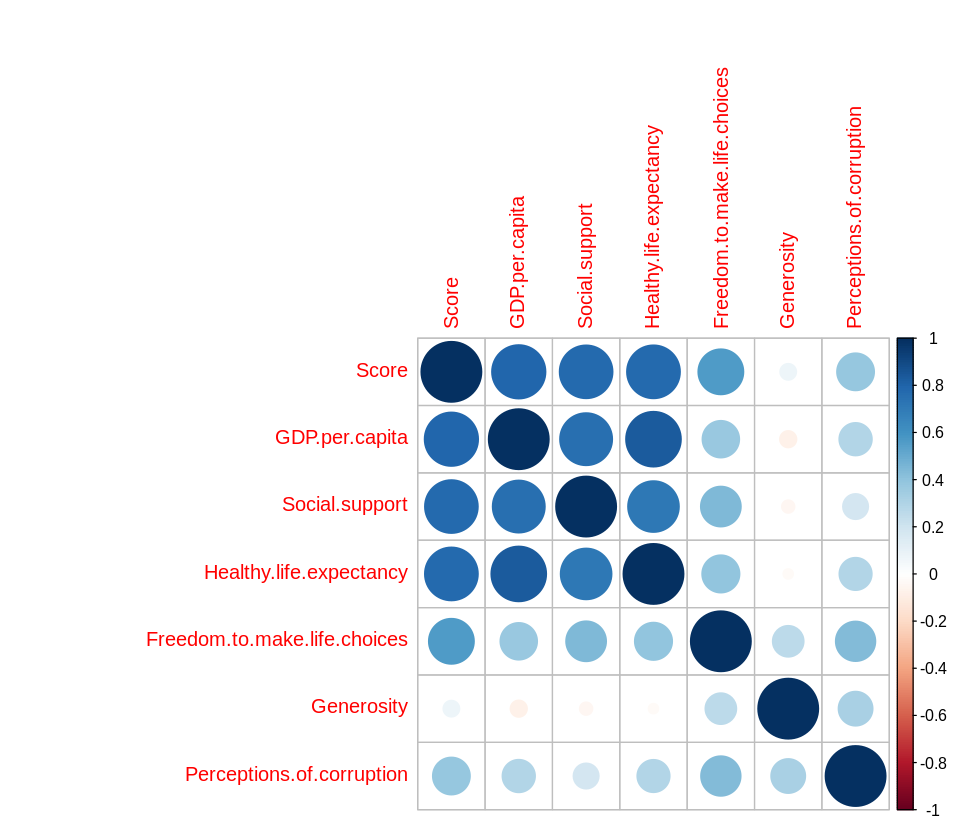

In [78]:
options(repr.plot.width = 8, repr.plot.width = 8)

correlation_matrix <- cor(data[,-(1:2)])
corrplot(correlation_matrix)

In [79]:
library(ggplot2)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



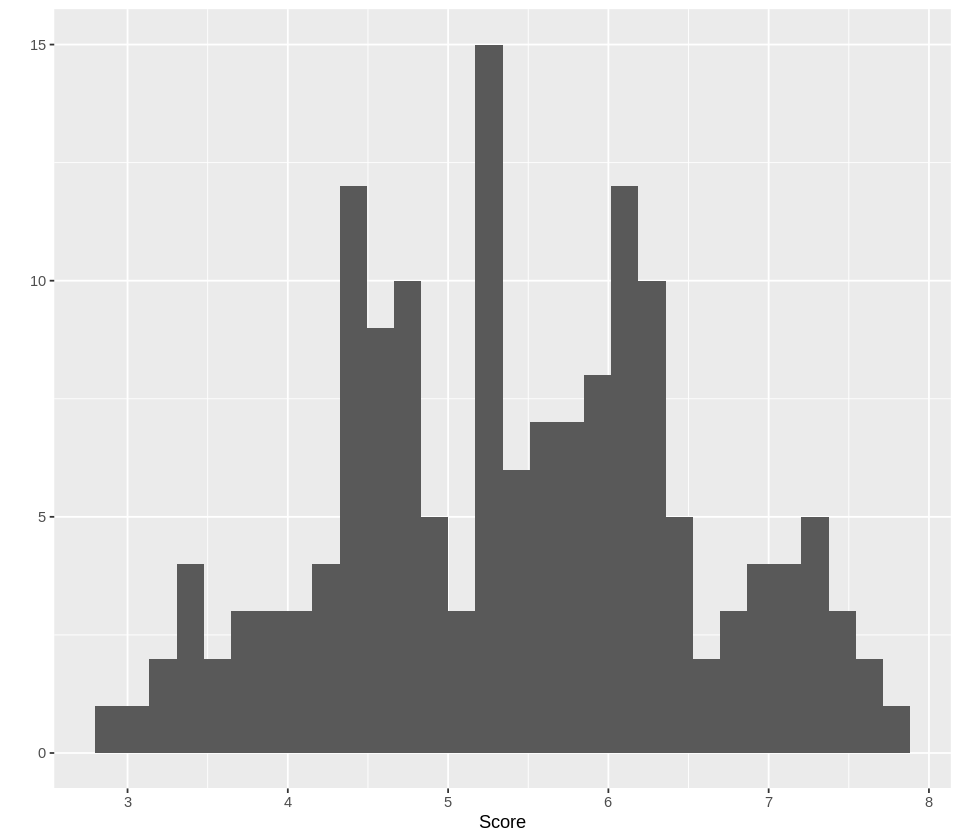

In [81]:
qplot(Score, data = data, geom = "histogram")

In [82]:
summary(data$Score)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.853   4.545   5.380   5.407   6.184   7.769 

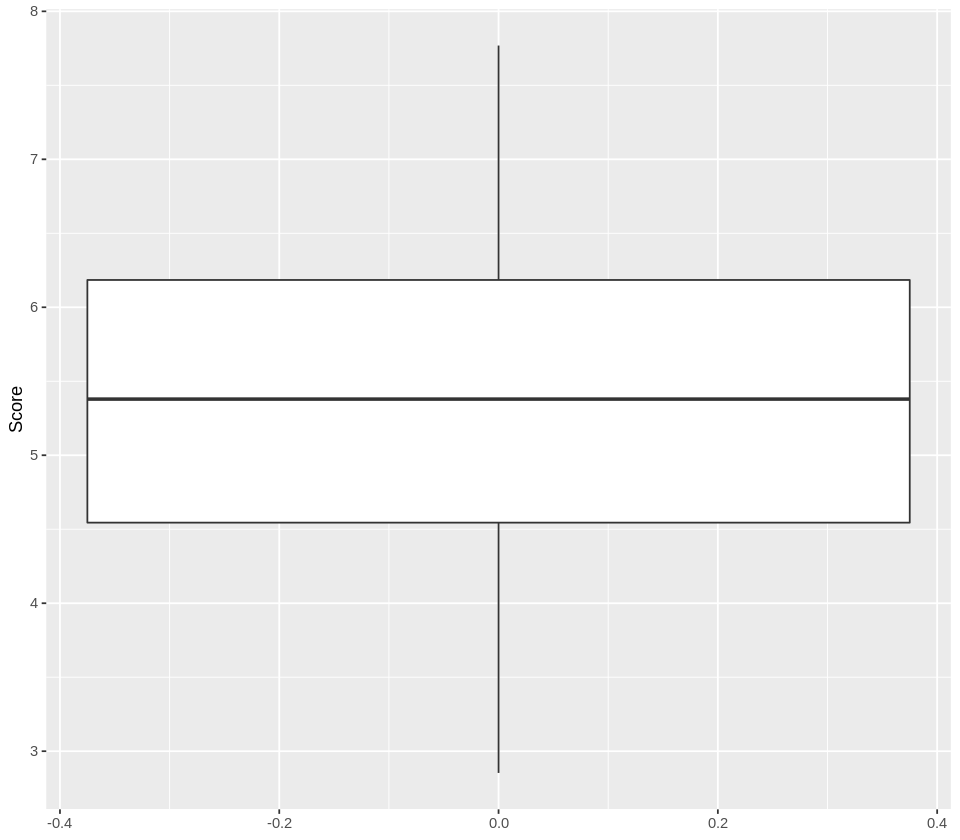

In [83]:
# Boxplot Score
ggplot(data,aes(y = Score)) + 
  geom_boxplot()


In [84]:
correlation_matrix

,Score,GDP.per.capita,Social.support,Healthy.life.expectancy,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption
Score,1.00000000,0.79388287,0.77705779,0.77988315,0.5667418,0.07582369,0.3856131
GDP.per.capita,0.79388287,1.00000000,0.75490573,0.83546212,0.3790791,-0.07966231,0.2989198
Social.support,0.77705779,0.75490573,1.00000000,0.71900946,0.4473332,-0.04812645,0.1818995
Healthy.life.expectancy,0.77988315,0.83546212,0.71900946,1.00000000,0.3903948,-0.02951086,0.2952828
Freedom.to.make.life.choices,0.56674183,0.37907907,0.44733316,0.39039478,1.0000000,0.26974181,0.4388433
Generosity,0.07582369,-0.07966231,-0.04812645,-0.02951086,0.2697418,1.00000000,0.3265375
Perceptions.of.corruption,0.38561307,0.29891985,0.18189946,0.29528281,0.4388433,0.32653754,1.0000000


In [85]:
data$Score

[1] 7.769 7.600 7.554 7.494 7.488 7.480 7.343 7.307 7.278 7.246 7.228 7.167
 [13] 7.139 7.090 7.054 7.021 6.985 6.923 6.892 6.852 6.825 6.726 6.595 6.592
 [25] 6.446 6.444 6.436 6.375 6.374 6.354 6.321 6.300 6.293 6.262 6.253 6.223
 [37] 6.199 6.198 6.192 6.182 6.174 6.149 6.125 6.118 6.105 6.100 6.086 6.070
 [49] 6.046 6.028 6.021 6.008 5.940 5.895 5.893 5.890 5.888 5.886 5.860 5.809
 [61] 5.779 5.758 5.743 5.718 5.697 5.693 5.653 5.648 5.631 5.603 5.529 5.525
 [73] 5.523 5.467 5.432 5.430 5.425 5.386 5.373 5.339 5.323 5.287 5.285 5.274
 [85] 5.265 5.261 5.247 5.211 5.208 5.208 5.197 5.192 5.191 5.175 5.082 5.044
 [97] 5.011 4.996 4.944 4.913 4.906 4.883 4.812 4.799 4.796 4.722 4.719 4.707
[109] 4.700 4.696 4.681 4.668 4.639 4.628 4.587 4.559 4.548 4.534 4.519 4.516
[121] 4.509 4.490 4.466 4.461 4.456 4.437 4.418 4.390 4.374 4.366 4.360 4.350
[133] 4.332 4.286 4.212 4.189 4.166 4.107 4.085 4.015 3.975 3.973 3.933 3.802
[145] 3.775 3.663 3.597 3.488 3.462 3.410 3.380 3.334 3.231 3.203 3.083 2.853

In [106]:
IQR(data$Score)
Q1 <- quantile(data$Score, 0.25)
cota_inferior <- Q1 - 0.5*IQR(data$Score)
Q3 <- quantile(data$Score, 0.75)
cota_superior <- Q3 + 0.5*IQR(data$Score)
rango_iqr = cota_superior - cota_inferior

[1] 1.64

In [107]:
data[data$Score < cota_inferior,]
data[data$Score > cota_superior,]

,Overall.rank,Country.or.region,Score,GDP.per.capita,Social.support,Healthy.life.expectancy,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
146,146,Zimbabwe,3.663,0.366,1.114,0.433,0.361,0.151,0.089
147,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110
148,148,Botswana,3.488,1.041,1.145,0.538,0.455,0.025,0.100
149,149,Syria,3.462,0.619,0.378,0.440,0.013,0.331,0.141
150,150,Malawi,3.410,0.191,0.560,0.495,0.443,0.218,0.089
151,151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077
152,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
153,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
154,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025


,Overall.rank,Country.or.region,Score,GDP.per.capita,Social.support,Healthy.life.expectancy,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
6,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
7,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
8,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
9,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308


In [114]:
scaled_data <- as.data.frame(scale(data[,-(1:2)])) # Escalamos

In [122]:
kmeans_prueba <- kmeans(x = scaled_data, centers = 2) # Pendiente

In [124]:
kmeans_prueba$cluster

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 2
 [75] 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 1 1 1 1 1 1 2 1 2 2 2 1 2 2 2 2 2 2 1 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2 2 2 2 2 2 2

In [125]:
tot_withinss <- list()
for(i in 1:10){
   kmeans_prueba <- kmeans(x = scaled_data, centers = i)
   tot_withinss[[i]] <- kmeans_prueba$tot.withinss
}

In [140]:
elbow_df <- data.frame(k = 1:10, tot = as.numeric(tot_withinss))
elbow_df

k,tot
<int>,<dbl>
1,1085.0000
2,682.0926
3,492.5347
4,436.3344
5,373.8665
6,346.8704
7,313.1384
8,288.9257
9,280.5490


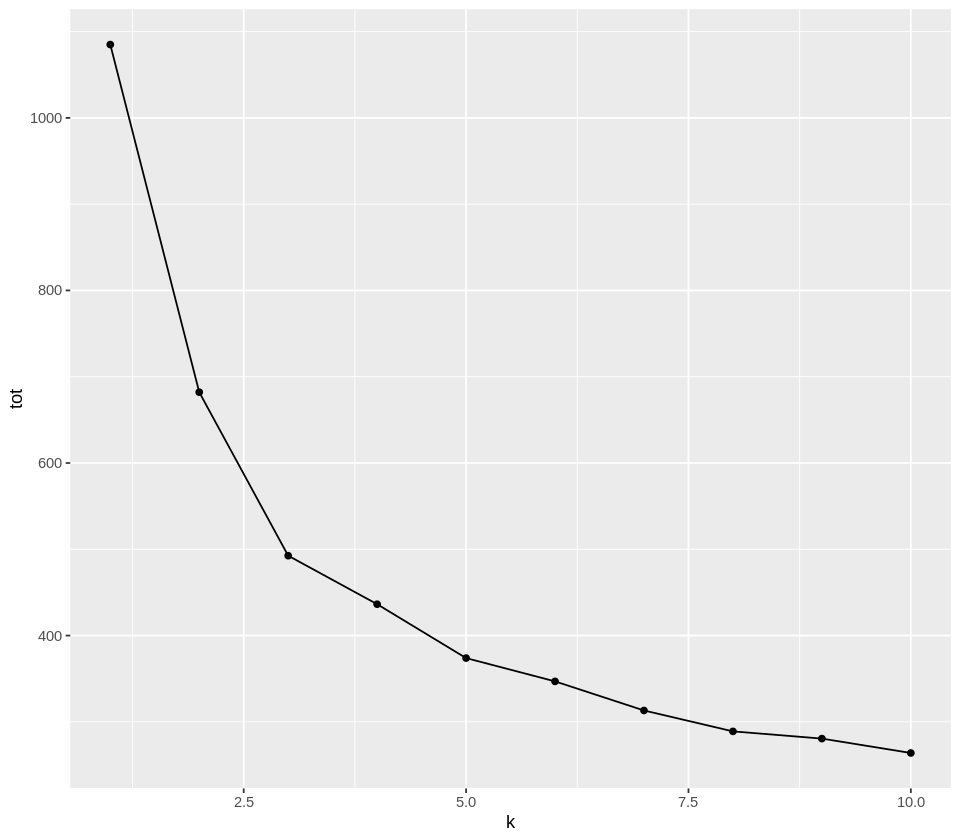

In [142]:
ggplot(elbow_df, aes(x = k, y = tot)) + geom_point() + geom_line()